In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
X, Y = make_blobs?

In [2]:
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)
print(X.shape, Y.shape)

(500, 2) (500,)


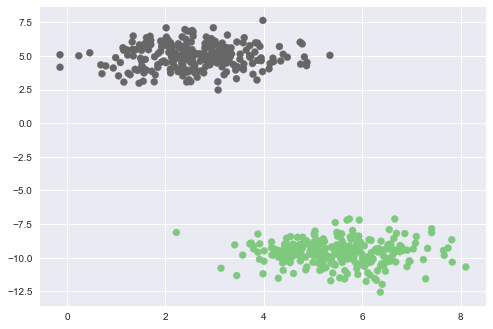

In [3]:
#Data Visualization
plt.style.use('seaborn')
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

## Defining required functions for training a perceptron 

In [4]:
def sigmoid(z):
    return (1.0)/(1 + np.exp(-z))


def predict(X, weights):
    """ X is a mx(n+1) matrix, and weights is (n+1), vector, where m: number of training examples, n:number of features"""
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions


def loss(X, Y, weights):
    """ Binary cross entropy, or log loss"""
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost


# To learn weights
def update(X, Y, weights, learning_rate):
    """ Perform weight updates for one epoch"""
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights


def train(X, Y, learning_rate=0.5, maxEpochs=100):
    
    #Modify the input to adjust the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    
    #Initialize weights as 0
    weights = np.zeros(X.shape[1])
    
    #Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        # Print progress after every 50 epochs
        if epoch%50 == 0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss%.4f"%(epoch,l))
            
            
    return weights       
        
        
    

In [5]:
train(X,Y)

Epoch 0 Loss0.0006
Epoch 50 Loss0.0004


array([ 0.02204952, -0.30768518,  1.90003958])

In [6]:
train(X,Y, maxEpochs=200)

Epoch 0 Loss0.0006
Epoch 50 Loss0.0004
Epoch 100 Loss0.0004
Epoch 150 Loss0.0003


array([ 0.03711724, -0.26726659,  1.95420335])

In [7]:
train(X,Y, maxEpochs=1000)

Epoch 0 Loss0.0006
Epoch 50 Loss0.0004
Epoch 100 Loss0.0004
Epoch 150 Loss0.0003
Epoch 200 Loss0.0003
Epoch 250 Loss0.0002
Epoch 300 Loss0.0002
Epoch 350 Loss0.0002
Epoch 400 Loss0.0002
Epoch 450 Loss0.0002
Epoch 500 Loss0.0001
Epoch 550 Loss0.0001
Epoch 600 Loss0.0001
Epoch 650 Loss0.0001
Epoch 700 Loss0.0001
Epoch 750 Loss0.0001
Epoch 800 Loss0.0001
Epoch 850 Loss0.0001
Epoch 900 Loss0.0001
Epoch 950 Loss0.0001


array([ 0.09276028, -0.12220098,  2.15017526])

In [8]:
train(X,Y, learning_rate= 0.3, maxEpochs=200)

Epoch 0 Loss0.0064
Epoch 50 Loss0.0019
Epoch 100 Loss0.0012
Epoch 150 Loss0.0008


array([0.09716155, 0.02883587, 1.48018943])

In [9]:
train(X,Y, learning_rate= 0.8, maxEpochs=200)

Epoch 0 Loss0.0000
Epoch 50 Loss0.0000
Epoch 100 Loss0.0000
Epoch 150 Loss0.0000


array([ 0.00407748, -0.57682193,  2.92447936])

In [10]:
w_array = train(X,Y, learning_rate= 0.7, maxEpochs=200)

Epoch 0 Loss0.0001
Epoch 50 Loss0.0001
Epoch 100 Loss0.0001
Epoch 150 Loss0.0001


In [11]:
w_array

array([ 0.00883964, -0.49006488,  2.57674109])

## Getting predictions from the trained model

In [12]:
def getPredictions(X_Test, weights, labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0], 1))
        X_Test = np.hstack((ones,X_Test))
        
    probs = predict(X_Test, weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels
    

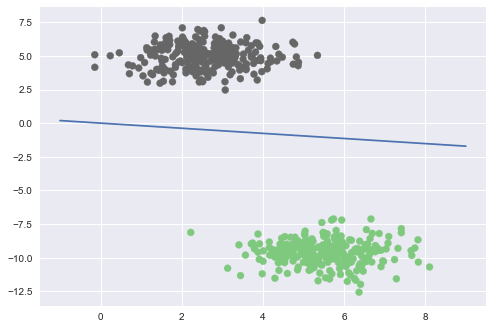

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)

# Picking random points to check hypothesis
x1 = np.linspace(-1,9,20)

#Hypotheis
x2 = (w_array[0] + w_array[1]*x1)/w_array[2]

plt.plot(x1,x2)
plt.show()

In [14]:
# Getting model accuracy
def accuracy(X, weights, labels=True):
    Y_ = getPredictions(X, weights, labels=True)
    
    if not labels:
        MSE = np.mean((Y_ - Y)**2)
        print("Mean squared error is: ", MSE)
        return
    else:
        model_acc = np.sum(Y_==Y)/Y.shape[0]
        return model_acc

In [15]:
accuracy(X, w_array)

1.0